<a href="https://colab.research.google.com/github/EndangSupriyadi/Proyek_Pertama_Machine_Learning_Terapan/blob/main/Proyek_Pertama_Endang_Supriyadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# - Data Loading
Pertama kita menginstall library yang dibutuhkan seperti dibawah ini

In [ ]:
! pip install kaggle
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor




# - menyambungkan google colab dengan gdrive kita

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# - mengatur directori

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

# - masuk ke direktori yang telah kita tentukan

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


# - Mendownload data set dengan menggunakan API yang ada di kagle dan nantinya dataset ini akan tersimpan dalam directori yang telah kita tentukan

In [ ]:
!kaggle datasets download -d sid321axn/gold-price-prediction-dataset

gold-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# - Menunzip dataset karena dataset kita setelah didownload akan berbentuk zip dan kita unzip agar bisa kita gunakan

In [ ]:
!unzip \*.zip && rm *.zip.

Archive:  gold-price-prediction-dataset.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: FINAL_USO.csv           
rm: cannot remove '*.zip.': No such file or directory


# - Eksploratory Data
Membaca dataset yang telah diunzip sesuai path directori yang menyimpan dataset dan menampilkan isi dataset

In [ ]:
# load the dataset
df = '/content/gdrive/MyDrive/Kaggle/FINAL_USO.csv'
golds = pd.read_csv(df)
golds

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


Menampilkan info mengenai data frame



In [ ]:
golds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Menampilkan hasil statistik deskriptif dari dataframe seperti count, mean dll

In [ ]:
golds.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


# Univariate Analysis
dataset ini bertipe time series sehingga date harus diubah ke type date dan nantinya akan menampilkan data close perdatenya

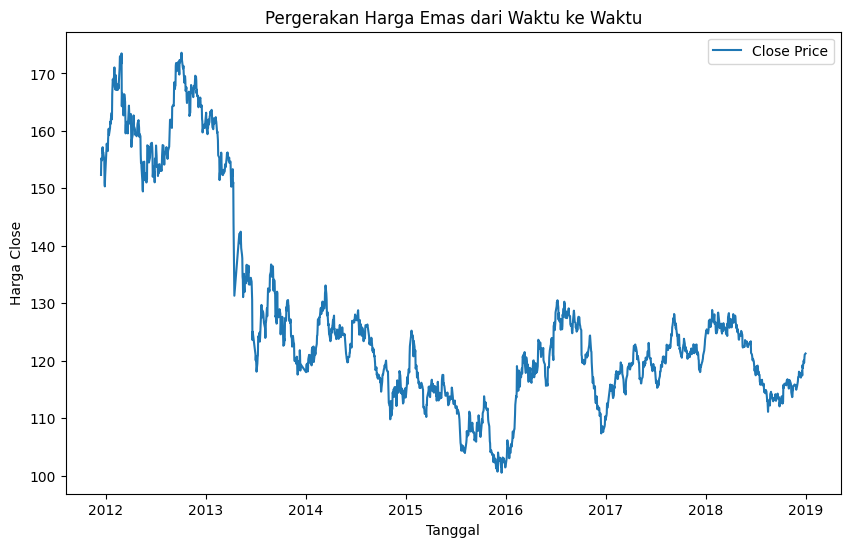

In [ ]:
# Mengonversi kolom tanggal ke tipe data datetime
golds['Date'] = pd.to_datetime(golds['Date'])

# Menampilkan grafik pergerakan harga dari waktu ke waktu
plt.figure(figsize=(10, 6))
plt.plot(golds['Date'], golds['Close'], label='Close Price')
plt.title('Pergerakan Harga Emas dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Close')
plt.legend()
plt.show()

cek nilai missing value pada kolom open, high, dan low

In [ ]:
open = (golds.Open == 0).sum()
high = (golds.High == 0).sum()
low = (golds.Low == 0).sum()

print("Nilai 0 di kolom open ada: ", open)
print("Nilai 0 di kolom high ada: ", high)
print("Nilai 0 di kolom low ada: ", low)


Nilai 0 di kolom open ada:  0
Nilai 0 di kolom high ada:  0
Nilai 0 di kolom low ada:  0


Menghapus kolom Date dan cek dataframe

In [ ]:
golds = golds.drop("Date" , axis = 1)


In [ ]:
golds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           1718 non-null   float64
 1   High           1718 non-null   float64
 2   Low            1718 non-null   float64
 3   Close          1718 non-null   float64
 4   Adj Close      1718 non-null   float64
 5   Volume         1718 non-null   int64  
 6   SP_open        1718 non-null   float64
 7   SP_high        1718 non-null   float64
 8   SP_low         1718 non-null   float64
 9   SP_close       1718 non-null   float64
 10  SP_Ajclose     1718 non-null   float64
 11  SP_volume      1718 non-null   int64  
 12  DJ_open        1718 non-null   float64
 13  DJ_high        1718 non-null   float64
 14  DJ_low         1718 non-null   float64
 15  DJ_close       1718 non-null   float64
 16  DJ_Ajclose     1718 non-null   float64
 17  DJ_volume      1718 non-null   int64  
 18  EG_open 

# - Menangani Outliers
Visualisasi data golds dengan boxplot unntuk deteksi outliers pada beberapa fitur numerik

<Axes: xlabel='Open'>

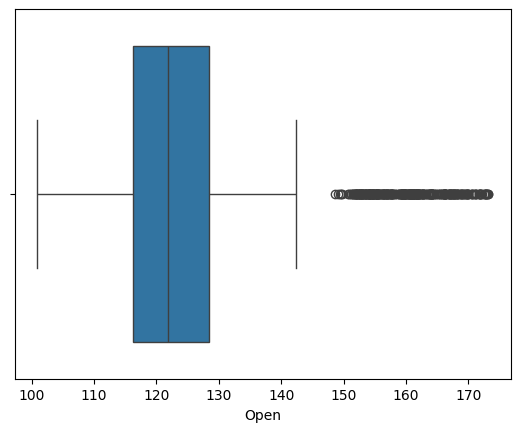

In [ ]:
sns.boxplot(x=golds['Open'])

<Axes: xlabel='High'>

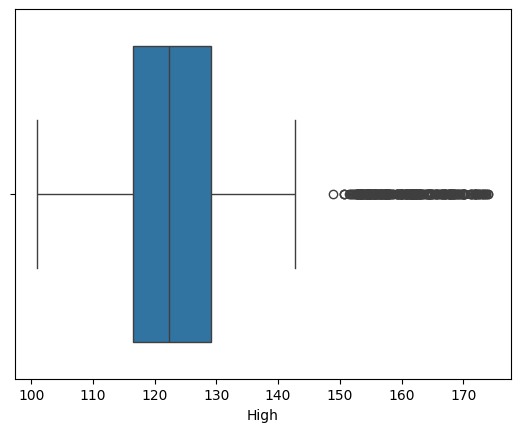

In [ ]:
sns.boxplot(x=golds['High'])

<Axes: xlabel='Low'>

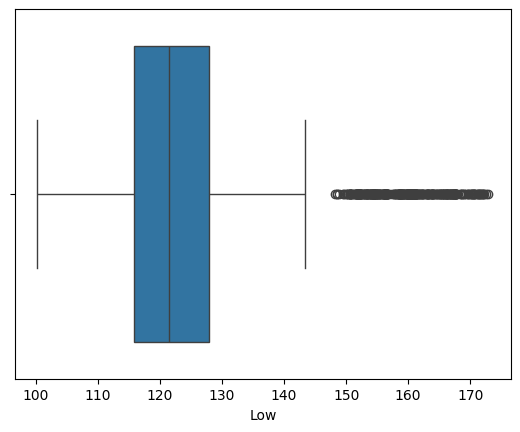

In [ ]:
sns.boxplot(x=golds['Low'])

<Axes: xlabel='Close'>

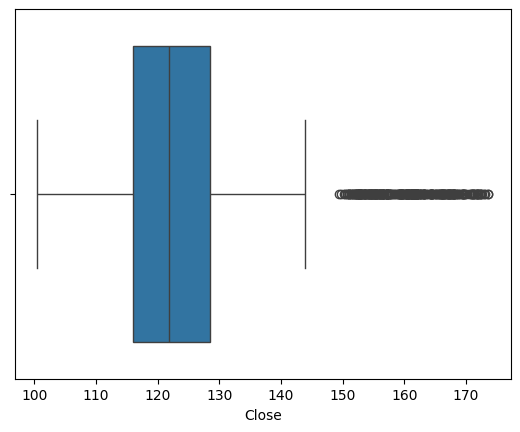

In [ ]:
sns.boxplot(x=golds['Close'])

Mengatasi Outliers dengan metode IQR yang berada di luar Q1 dan Q3



In [ ]:
Q1 = golds.quantile(0.25)
Q3 = golds.quantile(0.75)
IQR=Q3-Q1
golds=golds[~((golds<(Q1-1.5*IQR))|(golds>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
golds.shape

(835, 80)

menghitung korelasi antara kolom-kolom dalam dataframe goals dan menvisualisasikannya sehingga jika semakin tinggi nilai korelasi semakin kuat hubungan antara kolom target dan kolom yang bersangkutan

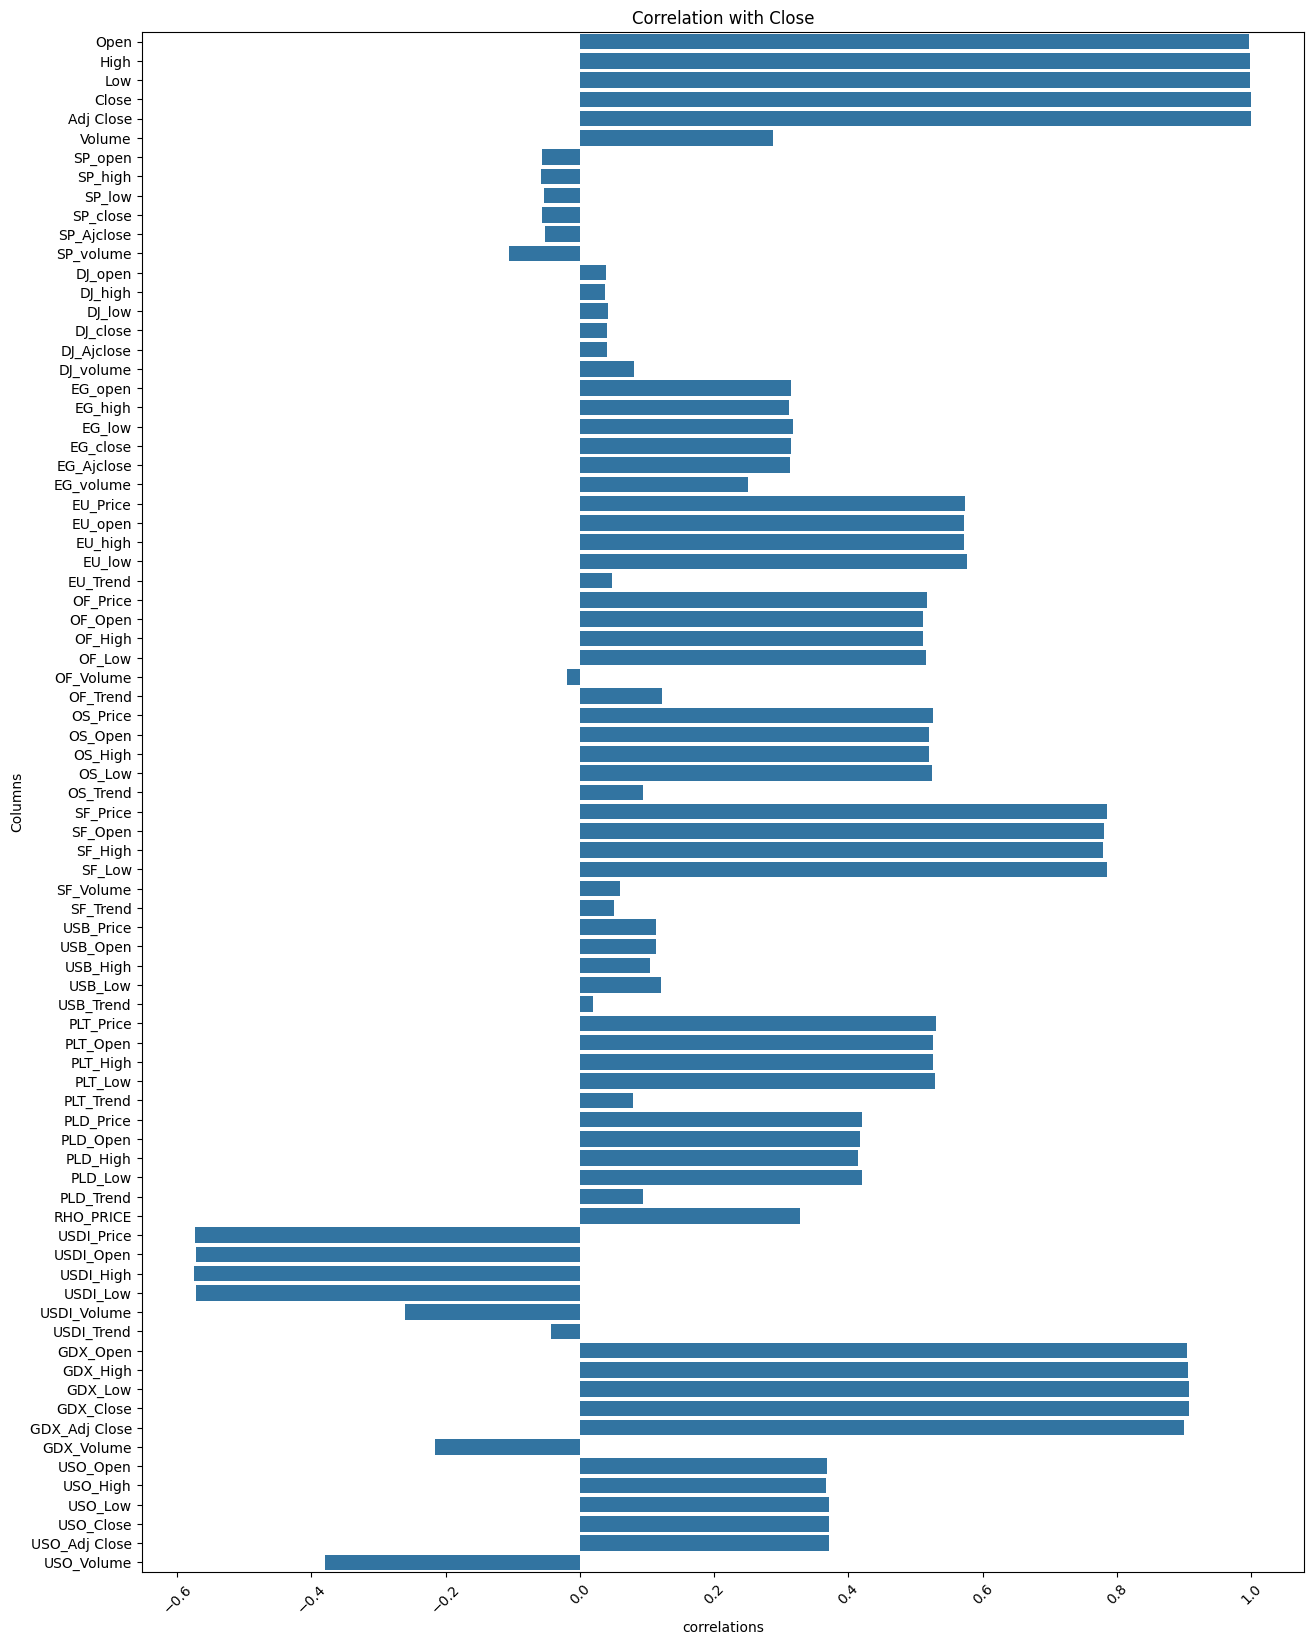

In [ ]:
target_column = 'Close'

# Calculate correlation matrix
correlation_matrix = golds.corr()

# Select the correlation values for the target column
correlations = correlation_matrix[target_column]

# Create a bar plot or heatmap to visualize the correlations
plt.figure(figsize=(15, 20))
sns.barplot(x=correlations.values, y=correlations.index)
plt.title(f'Correlation with {target_column}')
plt.xlabel('correlations')
plt.ylabel('Columns')
plt.xticks(rotation=45)
plt.show()

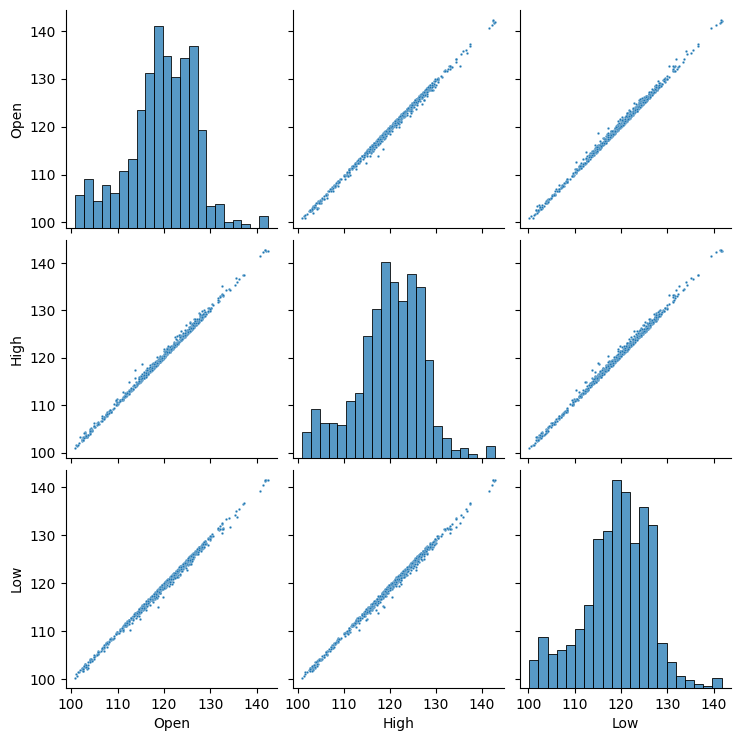

In [ ]:
sns.pairplot(golds[['Open','High', 'Low']], plot_kws={"s": 3});


# - Data Preparation
Train Test Split </br>
membagi data latih dan data uji 80:20

In [ ]:

X = golds.drop(["Close"],axis =1)
y = golds["Close"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 835
Total # of sample in train dataset: 668
Total # of sample in test dataset: 167


- Standarisasi
yang nantinya akaan mengubah nilai mean menjadi 0 dan standar deviasi menjadi **1**

In [ ]:

numerical_features = ['Open','High', 'Low']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()


,Open,High,Low
946,-2.165675,-2.204928,-2.194981
1381,0.421708,0.373206,0.449826
893,-1.680881,-1.676567,-1.634293
1044,-0.293227,-0.245926,-0.250350
762,-0.406255,-0.446433,-0.465053


In [ ]:
X_train[numerical_features].describe().round(4)


,Open,High,Low
count,668.0000,668.0000,668.0000
mean,-0.0000,-0.0000,0.0000
std,1.0007,1.0007,1.0007
min,-2.5279,-2.5667,-2.5697
25%,-0.5213,-0.5281,-0.5515
50%,0.0949,0.1077,0.1025
75%,0.7363,0.7366,0.7281
max,3.1112,3.0855,3.0933


# - Model Development

mecoba membuat 3 buah model machine learning dengan algoritma : </br>
1. K-Nearest Neighbor (KNN)
2. Random Forest
3. Boosting Algorithm </br>
yang nantinya kita akan membandingkan mana model yang efektif dalam menyelesaikan kasus ini


In [ ]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Model KNN <br>
menggunakan nilai K =10

In [ ]:

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Model Random Forest <br>
menggunakan nilai n_etimator (jumlah trees)=45<br>
max_depth (panjang atau kedalam pohon) = 16 <br>
random_state =60 <br>
n_jobs =-1

In [ ]:


# buat model prediksi
RF = RandomForestRegressor(n_estimators=45, max_depth=16, random_state=60, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Model Boosting Algorithm <br>
nilai learning_rate = 0.05 <br>
random_state = 60

In [ ]:

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=60)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# - Evaluasi Model
dengan mentrik MSE

In [ ]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse


,train,test
KNN,0.029005,0.034733
RF,0.000008,0.000046
Boosting,0.000575,0.000602


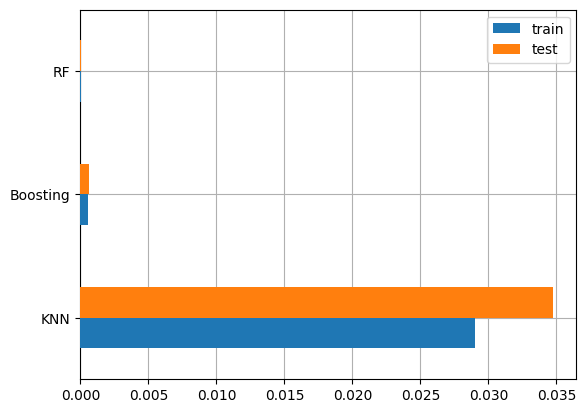

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

disini nilai prediksi Random Forest mendekati nilai uji walaupun nilai prediksi model Boasting juga mendekati

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
915,109.139999,117.9,109.3,107.8
